In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("cleanedfinal.csv")

In [ ]:
# Features (X) and Target (y)
x = df.drop("expenses", axis=1)
y = df["expenses"]

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled  = scaler.transform(x_test)

In [ ]:
def ridge_regression(x, y, lamda, lr=0.01, n_iters=1000):
    n_samples, n_features = x.shape
    beta = np.zeros(n_features)

    for i in range(n_iters):
        y_pred = x @ beta

        gradient = (-2 / n_samples) * (x.T @ (y - y_pred))

        # Ridge penalty gradient
        gradient += 2 * lamda * beta

        beta -= lr * gradient   # ← Learning rate applied here

    return beta

In [ ]:
n_iters = 1000
losses = []

beta = np.zeros(x.shape[1])   # beta initialization

for i in range(n_iters):
    y_pred = x @ beta

    loss = np.mean((y - y_pred) ** 2)
    losses.append(loss)



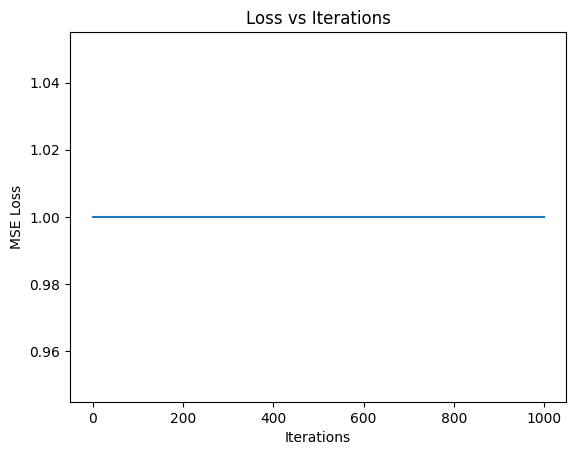

In [ ]:
plt.plot(losses)
plt.title("Loss vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("MSE Loss")
plt.show()

In [ ]:
# Add bias (intercept) column manually
x_bias = np.c_[np.ones(x_train_scaled.shape[0]), x_train_scaled]

beta_ridge = ridge_regression(x_bias, y_train.values, lamda=1.0)

# Predictions
x_test_bias = np.c_[np.ones(x_test_scaled.shape[0]), x_test_scaled]
ridge_preds = x_test_bias @ beta_ridge


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

ridge_mse = mean_squared_error(y_test, ridge_preds)
ridge_rmse = np.sqrt(ridge_mse)
ridge_r2 = r2_score(y_test, ridge_preds)

print("Ridge Performance")
print("MSE :", ridge_mse)
print("RMSE:", ridge_rmse)
print("R²  :", ridge_r2)


Ridge Performance
MSE : 0.3376586860752125
RMSE: 0.5810840611092447
R²  : 0.6599955198199425


In [ ]:
# Remove intercept
ridge_coeffs = beta_ridge[1:]
feature_names = x.columns


In [ ]:
coeff_df = pd.DataFrame({
    "Feature": feature_names,
    "Ridge Coefficient": ridge_coeffs
})

print(coeff_df)


         Feature  Ridge Coefficient
0   Unnamed: 0.1           0.004764
1     Unnamed: 0           0.004772
2            age           0.150352
3         female          -0.006821
4           male           0.006821
5            bmi           0.083540
6       children           0.037302
7      no_smoker          -0.260977
8      is_smoker           0.260977
9      southeast           0.007354
10     southwest          -0.012126
11     northwest          -0.003346
12     northeast           0.007897


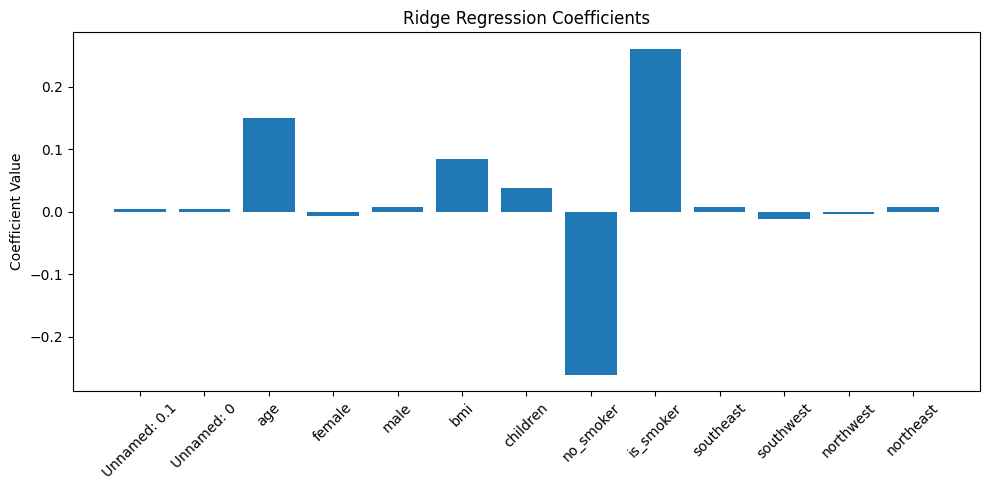

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(feature_names, ridge_coeffs)
plt.xticks(rotation=45)
plt.ylabel("Coefficient Value")
plt.title("Ridge Regression Coefficients")
plt.tight_layout()
plt.show()

In [ ]:
def lasso_regression(x, y, lamda, lr=0.01, n_iters=1000):
    n_samples, n_features = X.shape
    beta = np.zeros(n_features)

    for i in range(n_iters):
        y_pred = x @ beta

        gradient = (-2 / n_samples) * (x.T @ (y - y_pred))

        # L1 penalty gradient
        gradient += lamda * np.sign(beta)

        beta -= lr * gradient   # ← Learning rate controls update size

    return beta


In [ ]:
lasso_mse = mean_squared_error(y_test, lasso_preds)
lasso_rmse = np.sqrt(lasso_mse)
lasso_r2 = r2_score(y_test, lasso_preds)

print("\n Lasso Performance")
print("MSE :", lasso_mse)
print("RMSE:", lasso_rmse)
print("R²  :", lasso_r2)



 Lasso Performance
MSE : 0.24731517028350017
RMSE: 0.4973079230049529
R²  : 0.750966673209901


In [ ]:
lasso_coeffs = beta_lasso[1:]
feature_names = x.columns

In [ ]:
coeff_df = pd.DataFrame({
    "Feature": feature_names,
    "Lasso Coefficient": lasso_coeffs
})

print(coeff_df)

         Feature  Lasso Coefficient
0   Unnamed: 0.1           0.000178
1     Unnamed: 0           0.000241
2            age           0.253607
3         female           0.000412
4           male          -0.000412
5            bmi           0.106415
6       children           0.014445
7      no_smoker          -0.369014
8      is_smoker           0.369014
9      southeast          -0.000617
10     southwest           0.000181
11     northwest           0.000619
12     northeast           0.001198


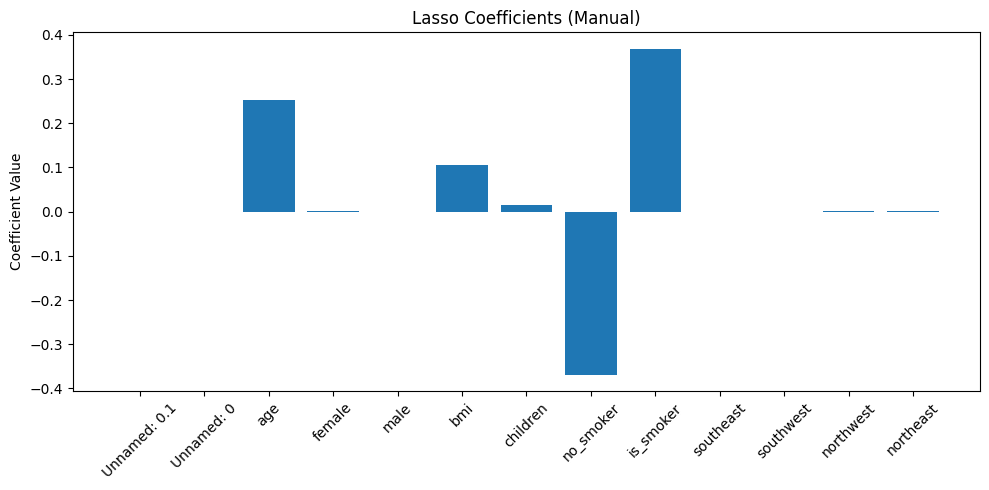

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(feature_names, lasso_coeffs)
plt.xticks(rotation=45)
plt.title("Lasso Coefficients (Manual)")
plt.ylabel("Coefficient Value")
plt.tight_layout()
plt.show()


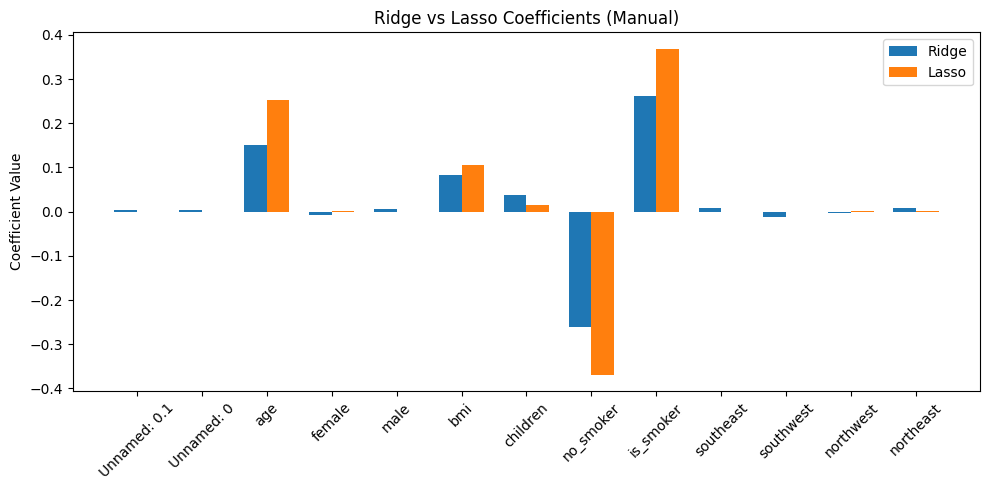

In [ ]:
x = np.arange(len(feature_names))
width = 0.35

plt.figure(figsize=(10,5))
plt.bar(x - width/2, ridge_coeffs, width, label="Ridge")
plt.bar(x + width/2, lasso_coeffs, width, label="Lasso")

plt.xticks(x, feature_names, rotation=45)
plt.ylabel("Coefficient Value")
plt.title("Ridge vs Lasso Coefficients (Manual)")
plt.legend()
plt.tight_layout()
plt.show()
